In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\1_Bhiwadi\Book_1_PM.csv')

In [3]:
df.head()
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
y = pd.Series(data=df['PM2.5'].values, index=df['Date'])

In [5]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['PM2.5'],order=(1, 1, 1),seasonal_order=(0,1,1,12))
results=model.fit()

<AxesSubplot:>

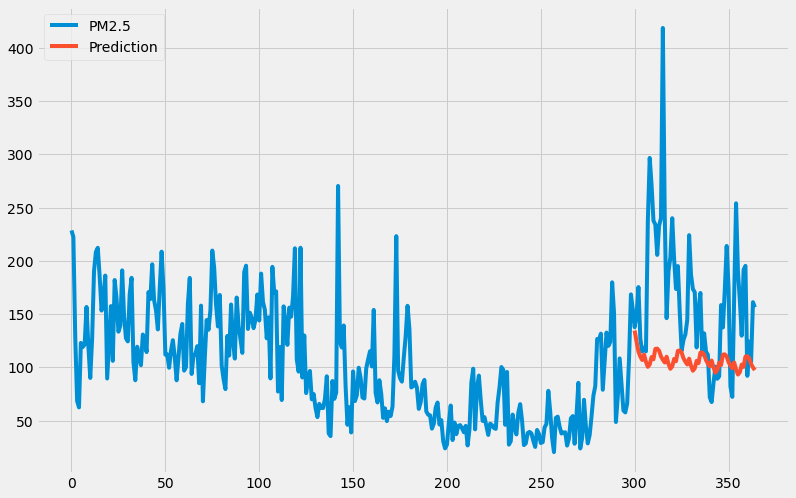

In [6]:
df['Prediction']=results.predict(start=300,end=365,dynamic=True)
df[['PM2.5','Prediction']].plot(figsize=(12,8))

In [7]:
df['Prediction']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
360    110.488717
361    108.530588
362    103.208381
363     99.989983
364     97.484096
Name: Prediction, Length: 365, dtype: float64

In [8]:
df.tail(66)

,Date,PM2.5,Prediction
299,2021-10-27,154.22,NaN
300,2021-10-28,137.74,134.572093
301,2021-10-29,149.00,124.016971
302,2021-10-30,175.40,114.980576
303,2021-10-31,127.06,110.157525
...,...,...,...
360,2021-12-27,92.11,110.488717
361,2021-12-28,124.25,108.530588
362,2021-12-29,105.15,103.208381
363,2021-12-30,161.22,99.989983


In [9]:
a=df.iloc[300:,1:2]
print(a)

      PM2.5
300  137.74
301  149.00
302  175.40
303  127.06
304  114.94
..      ...
360   92.11
361  124.25
362  105.15
363  161.22
364  156.41

[65 rows x 1 columns]


In [10]:
b=df.iloc[300:,2:]
print(b)

     Prediction
300  134.572093
301  124.016971
302  114.980576
303  110.157525
304  106.958373
..          ...
360  110.488717
361  108.530588
362  103.208381
363   99.989983
364   97.484096

[65 rows x 1 columns]


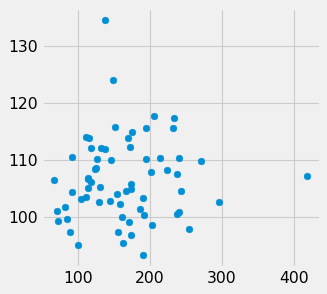

In [11]:
plt.figure(figsize=(4,4),dpi=80)
#plt.plot(legend=True,figsize=(4, 4))
plt.scatter(a,b)
plt.show()

<AxesSubplot:xlabel='PM2.5', ylabel='Prediction'>

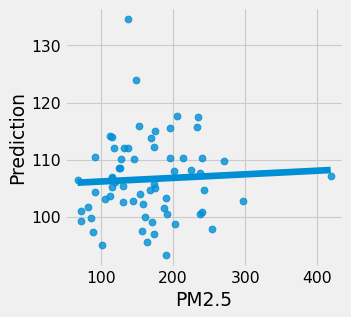

In [12]:
import seaborn as sb
plt.figure(figsize=(4,4),dpi=80)
sb.regplot(a,b,ci=None)

<AxesSubplot:>

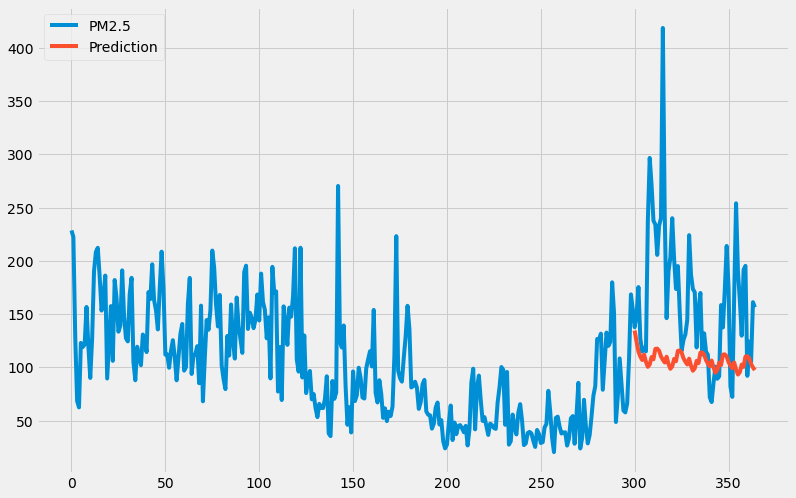

In [13]:
df[['PM2.5','Prediction']].plot(figsize=(12,8))

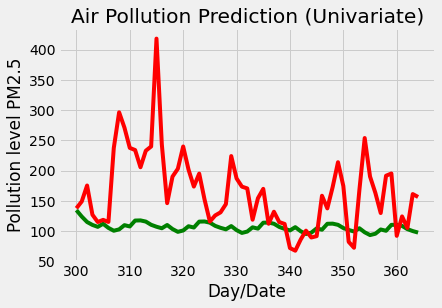

In [14]:
#Plot the graph between actual vs predicted values => 100 days
plt.plot(b, color= 'green')
plt.plot(a , color = 'red')
plt.title("Air Pollution Prediction (Univariate)")
plt.xlabel("Day/Date")
plt.ylabel("Pollution level PM2.5")
plt.show()

In [15]:
compare = pd.DataFrame(columns=['Actual','Predicted'])
compare['Actual'] = df['PM2.5']
compare['Predicted'] = Predictions
compare.head()

NameError: name 'Predictions' is not defined